<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Yair, my name is Dmitrii. I'm going to review your project 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
- It is great that you can use different methods for data processing and apply them to real data and project tasks, keep it up! 
- There is only one comment to be fixed: 
  -	Update graphs
  - Elaborate decision for outliers

I will wait for you to send me a new version of the project :)
    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with improvements! 

There is only one remaining remark regarding outliers. Can you please add an interim conclusion in that section to explain how these outliers have been determined?

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v3:</b>
    
<b>Overall Feedback</b> 
    
Thank you for submitting your project with additional comments.

There are no critical issues left, so your project has been accepted. Wish you cool projects in the next sprints! ☘️


# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added additional information about project tasks. It gives an overview of what you are going to achieve in this project.


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It would be helpful to delete the default supporting text to keep your notebook clean.

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries

import pandas as pd
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import numpy as np
import seaborn as sns


### Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data file into a DataFrame
data = pd.read_csv("/datasets/vehicles_us.csv")


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
len(data)

51525

In [5]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [6]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


[Describe what you notice in the general information and the printed data sample. Are there any issues that may need further investigation and changes?]

[Are there columns with inappropriate data types?]

In [7]:
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [8]:
data.isnull().sum() / len(data)*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
It is indeed always helpful to calculate the percentage of missing values. It helps to understand the overall impact and to make a more weighted decision regarding what to do next. for example, like this:

    `data.isnull().sum()*100/len(data)`

Or like this:

    `report = data.isna().sum().to_frame()
    report = report.rename(columns = {0: 'missing_values'})
    report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
    report.sort_values(by = 'missing_values', ascending = False)`

In [9]:
data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

In [10]:
data['type'] = data['type'].str.lower()


In [11]:
data['model_year'].unique()


array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

The year 1908 looks wrong, I will print those rows

In [12]:
data.loc[data['model_year']==1908]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,suv,black,NaN,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,suv,white,NaN,2018-06-24,25


According to Google, those models were released in 1998.

In [13]:
data.loc[33906,'model_year']=1998
data.loc[33907,'model_year']=1998

In [14]:
data.loc[33907,'model_year']
data.loc[33906,'model_year']

1998.0

In [15]:
data[data.model_year.isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,suv,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,suv,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


Let's see if there is a correlation between the rows 


In [16]:
data[(data.model_year.isnull())&(data.paint_color.isnull())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
165,22000,NaN,ford f350 super duty,good,8.0,diesel,163000.0,automatic,truck,NaN,1.0,2019-02-05,38
397,14995,NaN,chevrolet camaro,excellent,8.0,gas,95000.0,automatic,coupe,NaN,NaN,2018-06-29,15
443,2025,NaN,chevrolet tahoe,good,8.0,gas,151000.0,automatic,suv,NaN,1.0,2018-10-24,31
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,suv,NaN,NaN,2018-08-09,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51312,1800,NaN,hyundai santa fe,good,6.0,gas,287000.0,automatic,suv,NaN,NaN,2018-12-13,100
51339,19890,NaN,toyota tundra,excellent,8.0,gas,127405.0,automatic,truck,NaN,1.0,2019-02-02,69
51385,3495,NaN,jeep liberty,good,6.0,gas,129644.0,automatic,wagon,NaN,1.0,2018-08-22,28
51396,14995,NaN,ford f-150,good,8.0,gas,123676.0,automatic,truck,NaN,1.0,2018-07-12,13


It seems there is no correlation

<AxesSubplot:ylabel='Frequency'>

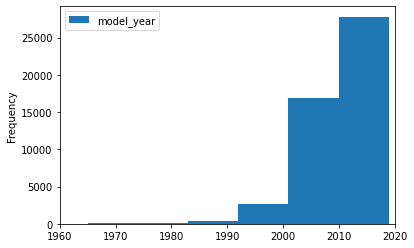

In [17]:
data.plot(kind='hist',y='model_year',xlim=(1960,2020))

In [18]:
data.groupby('model')['model_year'].median()

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [19]:
np.isinf(data.model_year).count()

51525

In [20]:
print(data["model_year"].unique())
print(data["model_year"].value_counts())

[2011.   nan 2013. 2003. 2017. 2014. 2015. 2012. 2008. 2018. 2009. 2010.
 2007. 2004. 2005. 2001. 2006. 1966. 1994. 2019. 2000. 2016. 1993. 1999.
 1997. 2002. 1981. 1995. 1996. 1975. 1998. 1985. 1977. 1987. 1974. 1990.
 1992. 1991. 1972. 1967. 1988. 1969. 1989. 1978. 1965. 1979. 1968. 1986.
 1980. 1964. 1963. 1984. 1982. 1973. 1970. 1955. 1971. 1976. 1983. 1954.
 1962. 1948. 1960. 1961. 1936. 1949. 1958. 1929.]
2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1949.0       1
1954.0       1
1929.0       1
1936.0       1
1961.0       1
Name: model_year, Length: 67, dtype: int64


In [21]:
data['model_year']=data['model_year'].fillna(data.groupby('model')['model_year'].transform('median'))

In [22]:
oldest_car= data.query("model_year <= 1967")
medium_car= data.query("2000 > model_year > 1967")
new_car = data.query("model_year >= 2001")
print(oldest_car["model_year"].value_counts())
print()
print(medium_car["model_year"].value_counts())

1966.0    23
1965.0    10
1967.0     7
1964.0     7
1962.0     3
1963.0     3
1960.0     3
1958.0     2
1929.0     1
1954.0     1
1936.0     1
1949.0     1
1955.0     1
1948.0     1
1961.0     1
Name: model_year, dtype: int64

1999.0    546
1998.0    380
1997.0    327
1996.0    189
1995.0    184
1994.0    118
1993.0    108
1989.0     58
1990.0     58
1992.0     57
1991.0     51
1988.0     40
1986.0     39
1987.0     31
1984.0     20
1979.0     19
1985.0     18
1968.0     16
1973.0     15
1978.0     15
1977.0     13
1980.0     12
1970.0     10
1969.0     10
1981.0     10
1982.0      9
1983.0      7
1975.0      7
1971.0      7
1972.0      5
1974.0      4
1976.0      3
Name: model_year, dtype: int64


In [23]:
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [24]:
print(data["model"].unique())


['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

Let's fix the issue with f150 ,  f-150 and fordf150

In [25]:
data["model"]= data["model"].str.replace('-', '')


In [26]:
print(data["model"].unique())


['bmw x5' 'ford f150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedesbenz benze sprinter 2500' 'honda crv' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'ford 

In [27]:
data["price"].unique()

array([ 9400, 25500,  5500, ...,  3636,  9249,  7455])

In [28]:
data["fuel"].value_counts()


gas         47288
diesel       3714
hybrid        409
other         108
electric        6
Name: fuel, dtype: int64

In [29]:
data["transmission"].value_counts()


automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

In [30]:
data["date_posted"].unique()


array(['2018-06-23', '2018-10-19', '2019-02-07', '2019-03-22',
       '2019-04-02', '2018-06-20', '2018-12-27', '2019-01-07',
       '2018-07-16', '2019-02-15', '2018-09-17', '2019-03-28',
       '2019-01-14', '2019-01-31', '2018-05-15', '2018-12-30',
       '2018-08-16', '2019-04-09', '2018-08-25', '2018-08-05',
       '2018-08-22', '2019-01-05', '2018-05-17', '2018-06-11',
       '2018-07-26', '2018-10-25', '2018-05-19', '2018-10-22',
       '2019-02-18', '2019-02-19', '2018-09-13', '2018-11-12',
       '2018-12-25', '2018-06-04', '2018-05-11', '2018-05-05',
       '2018-07-22', '2019-03-08', '2019-03-31', '2019-01-12',
       '2018-09-20', '2019-01-15', '2018-11-18', '2018-05-27',
       '2018-07-19', '2019-03-10', '2018-10-09', '2018-10-18',
       '2018-05-03', '2018-11-29', '2019-02-16', '2019-01-30',
       '2018-07-15', '2018-05-16', '2018-07-01', '2019-04-18',
       '2018-12-20', '2019-03-14', '2018-05-29', '2019-01-13',
       '2019-01-23', '2018-11-07', '2018-09-23', '2018-

In [31]:
data["days_listed"].unique()

array([ 19,  50,  79,   9,  28,  15,  73,  68,  17,  38,  29,  37,  24,
       111,  13,  25,  27,   8,  64,  39,  40,  43,  23,  42, 101,  20,
        14,   7,  31, 121,  22,  44,   1,  36,  21,  16,  10,  60,  51,
        35, 261,  71,  99,   2,  26,  48,  54,  85,  41,  53,   3,  33,
        30,  47,  32,  18,  52, 152,  11, 100,  94,  82, 141,  70,  57,
        62,  46,  96,  58,  34,  93,  49,  55,  67,  78,  12,   6, 108,
        72, 112,  83,  61,  59, 130,   4,  98,   5, 164,  56,  75,  74,
        80,  66,  63, 109,  81,  90, 127,  45,  88,  91,  77,  69,  89,
       114,  84, 110, 140, 104, 120,  97,  76,  92, 128, 113, 129,  65,
       115, 106, 116, 154, 151, 147, 124, 102,  87, 143,  95,  86, 132,
       105, 107,   0, 103, 117, 155, 118, 149, 144, 122, 137, 263, 148,
       156, 179, 126, 169, 136, 125, 131, 119, 177, 174, 173, 134, 171,
       145, 139, 166, 244, 228, 142, 135, 162, 183, 271, 138, 123, 157,
       201, 161, 158, 150, 181, 184, 256, 133, 146, 195, 207, 16

[Are there missing values across all columns or just a few? What columns contain the most missing values? Briefly describe what you see in 1-2 sentences.]

In [32]:
data[(data.is_4wd.isnull())&(data.paint_color.isnull())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,suv,NaN,NaN,2018-08-22,8
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,suv,NaN,NaN,2018-06-04,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51484,7999,2010.0,chevrolet traverse,excellent,6.0,gas,109363.0,automatic,suv,NaN,NaN,2018-12-15,25
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,suv,NaN,NaN,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,NaN,2019-02-27,73
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89


Now, there are only 4 columns with missing values without a significant correlation between them. The highest correlation is the one above

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

The data I am going to handle with are : is_4wd, paint_color, cylinders, odometer

## Treat missing values (if any)

[Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses.]

In [33]:
data.duplicated().sum()

0

In [34]:
data.groupby('model')['cylinders'].agg(Median='median')

,Median
model,
acura tl,6.0
bmw x5,6.0
buick enclave,6.0
cadillac escalade,8.0
chevrolet camaro,6.0
...,...
toyota sienna,6.0
toyota tacoma,6.0
toyota tundra,8.0


I will fill in the missing value by relating the model with quantity of cylinders

In [35]:
data['cylinders']= data['cylinders'].fillna(data.groupby('model')['cylinders'].transform('median'))
data.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [36]:
data['cylinders']= data['cylinders'].astype('int')
data['cylinders'].value_counts()

8     17712
6     17435
4     15499
10      549
5       294
3        34
12        2
Name: cylinders, dtype: int64

In [37]:
data['is_4wd']=data['is_4wd'].fillna(0)
data.is_4wd.isnull().sum()

0

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

You have done great work with missing values.    

**`is_4wd`**
    
Indeed, `is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature.
    

In [38]:
data['is_4wd'] = data['is_4wd'].astype('int')
data['is_4wd'].unique()
data['is_4wd'].value_counts()

0    25953
1    25572
Name: is_4wd, dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  int64  
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  int64  
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


In [40]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [41]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [42]:
data['paint_color']=data['paint_color'].fillna('unknown')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


**`paint_color`**   
That is also correct to fill it with others, as it is not possible to fill this value based on other car features.  
    
</div>

In [43]:
data['paint_color'].value_counts()

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

The paint color column is fixed

In [44]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f150,fair,8,gas,NaN,automatic,pickup,unknown,0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8,gas,NaN,automatic,pickup,red,1,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6,gas,NaN,automatic,suv,red,1,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4,gas,NaN,automatic,sedan,red,0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4,gas,NaN,automatic,sedan,unknown,0,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8,gas,NaN,automatic,truck,unknown,1,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8,gas,NaN,automatic,pickup,grey,1,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6,gas,NaN,automatic,suv,white,1,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4,gas,NaN,automatic,coupe,unknown,0,2018-11-24,89


In [45]:
data['odometer'].value_counts()

0.0         185
140000.0    183
120000.0    179
130000.0    178
160000.0    167
           ... 
280499.0      1
49814.0       1
194920.0      1
140800.0      1
269527.0      1
Name: odometer, Length: 17762, dtype: int64

In [46]:
data_group_odometer=data.groupby('model_year')['odometer'].mean()
data_group_odometer

model_year
1929.0             NaN
1936.0    30000.000000
1948.0     4000.000000
1949.0     1800.000000
1954.0     3565.000000
              ...     
2015.0    82503.819348
2016.0    61244.992120
2017.0    47317.910506
2018.0    25309.197445
2019.0    17076.810976
Name: odometer, Length: 69, dtype: float64

In [47]:
data_dict = pd.Series(data_group_odometer).to_dict()
data_dict

{1929.0: nan,
 1936.0: 30000.0,
 1948.0: 4000.0,
 1949.0: 1800.0,
 1954.0: 3565.0,
 1955.0: 47180.0,
 1958.0: 32991.5,
 1960.0: 16000.0,
 1961.0: 66000.0,
 1962.0: 49091.333333333336,
 1963.0: 40487.0,
 1964.0: 217016.66666666666,
 1965.0: 41424.8,
 1966.0: 68438.26315789473,
 1967.0: 76540.14285714286,
 1968.0: 43883.583333333336,
 1969.0: 35163.6,
 1970.0: 79770.0,
 1971.0: 48378.666666666664,
 1972.0: 79948.8,
 1973.0: 64568.28571428572,
 1974.0: 57377.666666666664,
 1975.0: 50366.666666666664,
 1976.0: 31519.0,
 1977.0: 80918.2,
 1978.0: 86503.84615384616,
 1979.0: 66375.55555555556,
 1980.0: 69965.90909090909,
 1981.0: 74958.0,
 1982.0: 67072.5,
 1983.0: 58791.4,
 1984.0: 96198.25,
 1985.0: 84299.58823529411,
 1986.0: 111335.51612903226,
 1987.0: 116229.26666666666,
 1988.0: 113950.69444444444,
 1989.0: 125687.54545454546,
 1990.0: 148989.28,
 1991.0: 146014.91304347827,
 1992.0: 153043.55102040817,
 1993.0: 171302.4534883721,
 1994.0: 155656.55555555556,
 1995.0: 159342.78125,
 1

In [48]:
data['odometer']=data['odometer'].fillna(data.model_year.map(data_dict))

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


Great that you've restored missing data using groupped values. 

In [49]:
data.loc[3]

price                    1500
model_year             2003.0
model               ford f150
condition                fair
cylinders                   8
fuel                      gas
odometer        162071.751024
transmission        automatic
type                   pickup
paint_color           unknown
is_4wd                      0
date_posted        2019-03-22
days_listed                 9
Name: 3, dtype: object

In [50]:
data[data['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f150,good,8,gas,NaN,manual,other,silver,0,2018-11-18,59


In [51]:
data= data.loc[data['model_year']!=1929]

In [52]:
data.reset_index(drop=True)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.000000,automatic,suv,unknown,1,2018-06-23,19
1,25500,2011.0,ford f150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003.0,ford f150,fair,8,gas,162071.751024,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28


All the missing values are now fixed

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [53]:
data["date_posted"]= pd.to_datetime(data["date_posted"], format= "%Y/%m/%d")

/tmp/ipykernel_44/440988706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date_posted"]= pd.to_datetime(data["date_posted"], format= "%Y/%m/%d")


In [54]:
data["model_year"]= data["model_year"].astype("int")

/tmp/ipykernel_44/1277058340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["model_year"]= data["model_year"].astype("int")


In [55]:
data["cylinders"]= data["cylinders"].astype("int")

/tmp/ipykernel_44/3510890691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cylinders"]= data["cylinders"].astype("int")


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

Well done that you have checked the data types. However, I would suggest minor changes:
- Here boolean type seems more appropriate for the column `is_4wd`.


## Enrich data

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51524 non-null  int64         
 1   model_year    51524 non-null  int64         
 2   model         51524 non-null  object        
 3   condition     51524 non-null  object        
 4   cylinders     51524 non-null  int64         
 5   fuel          51524 non-null  object        
 6   odometer      51524 non-null  float64       
 7   transmission  51524 non-null  object        
 8   type          51524 non-null  object        
 9   paint_color   51524 non-null  object        
 10  is_4wd        51524 non-null  int64         
 11  date_posted   51524 non-null  datetime64[ns]
 12  days_listed   51524 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.5+ MB


[Add additional factors to the data to make the analysis easier.]

In [57]:
# Add datetime values for when the ad was placed
data["day_of_week"]= data["date_posted"].dt.day_name()
data["month_posted"]= data["date_posted"].dt.month
print(data)


       price  model_year           model  condition  cylinders fuel  \
0       9400        2011          bmw x5       good          6  gas   
1      25500        2011       ford f150       good          6  gas   
2       5500        2013  hyundai sonata   like new          4  gas   
3       1500        2003       ford f150       fair          8  gas   
4      14900        2017    chrysler 200  excellent          4  gas   
...      ...         ...             ...        ...        ...  ...   
51520   9249        2013   nissan maxima   like new          6  gas   
51521   2700        2002     honda civic    salvage          4  gas   
51522   3950        2009  hyundai sonata  excellent          4  gas   
51523   7455        2013  toyota corolla       good          4  gas   
51524   6300        2014   nissan altima       good          4  gas   

            odometer transmission    type paint_color  is_4wd date_posted  \
0      145000.000000    automatic     suv     unknown       1  2018-06

/tmp/ipykernel_44/2671856367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["day_of_week"]= data["date_posted"].dt.day_name()
/tmp/ipykernel_44/2671856367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["month_posted"]= data["date_posted"].dt.month


In [58]:
# Add the vehicle's age when the ad was placed
data['year_posted'] =data['date_posted'].dt.year
data["car_age"]= data["year_posted"] - data["model_year"]



/tmp/ipykernel_44/2590781650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_posted'] =data['date_posted'].dt.year
/tmp/ipykernel_44/2590781650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["car_age"]= data["year_posted"] - data["model_year"]


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
I would suggest here adding  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `avg_yearly_mileage`. 

</div>

In [59]:
data["car_age"].value_counts

<bound method IndexOpsMixin.value_counts of 0         7
1         7
2         6
3        16
4         2
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Name: car_age, Length: 51524, dtype: int64>

In [60]:
# Add the vehicle's average mileage per year
data['avg_mile_year'] = data.groupby('model_year')['odometer'].transform('median')
data.head()


/tmp/ipykernel_44/4083065153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['avg_mile_year'] = data.groupby('model_year')['odometer'].transform('median')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,car_age,avg_mile_year
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,suv,unknown,1,2018-06-23,19,Saturday,6,2018,7,124883.614978
1,25500,2011,ford f150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,Friday,10,2018,7,124883.614978
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,102880.891908
3,1500,2003,ford f150,fair,8,gas,162071.751024,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,16,162071.751024
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,45640.000000


In [61]:
# It might help to replace the condition values with something that can be manipulated more easily
condition_dict={
   'salvage':0,
    'fair':1,
    'good':2,
    'excellent':3,
    'like new':4,
    'new':5  
}


In [62]:
condition_dict.keys()

dict_keys(['salvage', 'fair', 'good', 'excellent', 'like new', 'new'])

In [63]:
condition_dict.values()

dict_values([0, 1, 2, 3, 4, 5])

In [64]:
data['condition_cat5']=data['condition'].apply(lambda x: condition_dict[x])

/tmp/ipykernel_44/4188027290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition_cat5']=data['condition'].apply(lambda x: condition_dict[x])


In [65]:
type_dict={
    'suv':0, 'pickup':1, 'sedan':2, 'truck':3, 'coupe':4, 'van':5, 'convertible':6,
       'hatchback':7, 'wagon':8, 'mini-van':9, 'other':10, 'offroad':11, 'bus':12
}
data['type_cat']=data['type'].apply(lambda x: type_dict[x])
data['type_cat'].unique()

/tmp/ipykernel_44/1288551537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_cat']=data['type'].apply(lambda x: type_dict[x])


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Now the data has been prepared and ready for the following analysis.

</div>

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [66]:
# print the general/summary information about the DataFrame
print(data.info())
print(len(data))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51524 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51524 non-null  int64         
 1   model_year      51524 non-null  int64         
 2   model           51524 non-null  object        
 3   condition       51524 non-null  object        
 4   cylinders       51524 non-null  int64         
 5   fuel            51524 non-null  object        
 6   odometer        51524 non-null  float64       
 7   transmission    51524 non-null  object        
 8   type            51524 non-null  object        
 9   paint_color     51524 non-null  object        
 10  is_4wd          51524 non-null  int64         
 11  date_posted     51524 non-null  datetime64[ns]
 12  days_listed     51524 non-null  int64         
 13  day_of_week     51524 non-null  object        
 14  month_posted    51524 non-null  int64         
 15  ye

In [67]:
# print a sample of data
data.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,car_age,avg_mile_year,condition_cat5,type_cat
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,suv,unknown,1,2018-06-23,19,Saturday,6,2018,7,124883.614978,2,0
1,25500,2011,ford f150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,Friday,10,2018,7,124883.614978,2,1
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,Thursday,2,2019,6,102880.891908,4,2
3,1500,2003,ford f150,fair,8,gas,162071.751024,automatic,pickup,unknown,0,2019-03-22,9,Friday,3,2019,16,162071.751024,1,1
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,Tuesday,4,2019,2,45640.000000,3,2
5,14990,2014,chrysler 300,excellent,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,Wednesday,6,2018,4,93648.703319,3,2
6,12990,2015,toyota camry,excellent,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73,Thursday,12,2018,3,82503.819348,3,2
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,suv,black,1,2019-01-07,68,Monday,1,2019,6,102880.891908,3,0
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,suv,unknown,1,2018-07-16,19,Monday,7,2018,6,112051.523598,3,0
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,suv,blue,1,2019-02-15,17,Friday,2,2019,11,139878.910813,3,0


## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

<AxesSubplot:xlabel='price', ylabel='Count'>

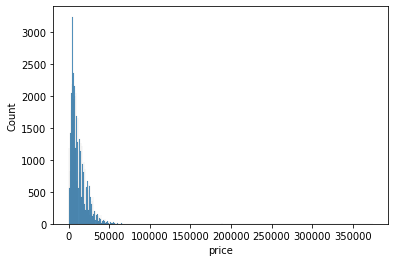

In [68]:
#
sns.histplot(data=data, x="price")


In [69]:
np.percentile(data.price,25)

5000.0

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

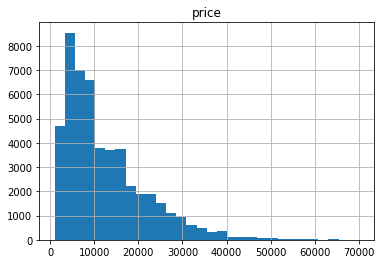

In [70]:
#
data.hist('price',bins=30,range=(1000,70000))



In [71]:
len(data[data['price']<1000])/len(data)

0.02724943715550035

In [72]:
len(data[data['price']>38000])/len(data)

0.01938902259141371

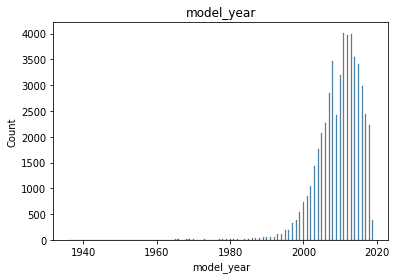

In [73]:
#
sns.histplot(data=data,x='model_year')
plt.title('model_year')
plt.show()

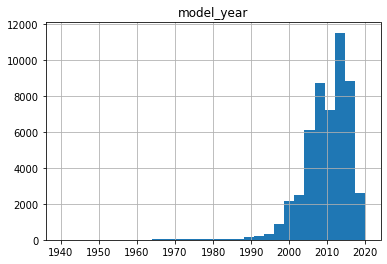

In [74]:
data.hist('model_year',bins=30,range=(1940,2020))
plt.show()

In [75]:
len(data[data['model_year']<1998])/len(data)

0.029578448878192685

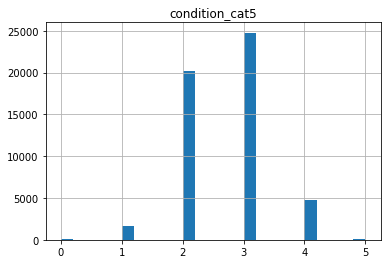

In [76]:
#
data.hist('condition_cat5',bins=25,range=(0,5))
plt.show()

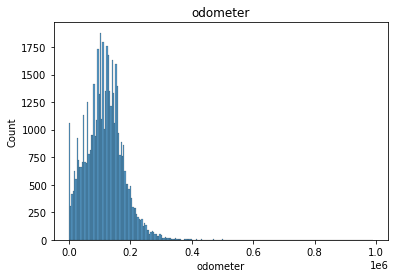

In [77]:
#
sns.histplot(data=data,x='odometer')
plt.title('odometer')
plt.show()


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.

Adding titles to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.
    
Can you please clean up your graphs a bit? 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Thank you for adding updates. 

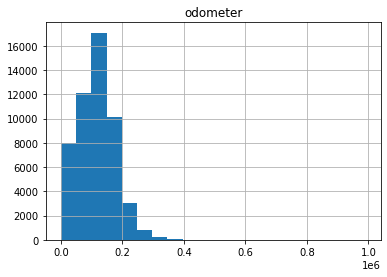

In [78]:
data.hist('odometer',bins=20,range=(0,data['odometer'].max()))
plt.show()


In [79]:
len(data[data['odometer']>240000])/len(data)

0.027482338327769584

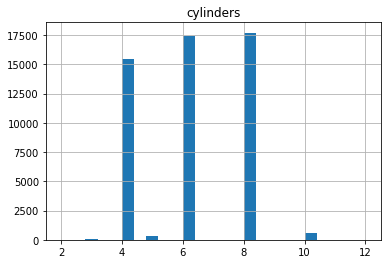

In [80]:
#
data.hist('cylinders',bins=25,range=(2,12))
plt.show()


In [81]:
len(data[data['cylinders']<4])/len(data) + len(data[data['cylinders']>8])/len(data)

0.011353932148125146

## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

In [82]:
# Determine the lower limits for outliers



In [83]:
# Determine the upper limits for outliers



In [84]:
data_clean=data[(data['price']>1000)&(data['price']<=38000)] 
data_clean=data_clean[data_clean['model_year']>=1998]
data_clean=data_clean[data_clean['odometer']<240000]

In chapter "Study core parameters" I have found that 98% of the cases are within those numbers, and cause of that decided to take those 98% rows withouy 2% outliers that would have exaggerated my research and conclusions.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>
    
Unfortunately, I did not notice any changes regarding this comment. Can you please a short interim conclusion in the markdown cell to elaborate how values above have been selected?

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v3:</b>
    
I can advise using np.percentile function to determine such thresholds. 


`np.percentile` is a function in the NumPy library that can be used to calculate the nth percentile of a given set of data. The function takes two arguments: the first is an array of data, and the second is the percentile value (expressed as a decimal between 0 and 100) that you want to calculate. For example, to calculate the 50th percentile (i.e., the median) of an array x, you would use the following code:

`
np.percentile(x, 50)
`

You can also calculate multiple percentiles at once by passing a list of percentiles to the function instead of a single value, like this:

`
np.percentile(data['price'], [2, 98])
`

This will return a list of the 2nd, 98th percentiles of car price values.

<AxesSubplot:xlabel='price'>

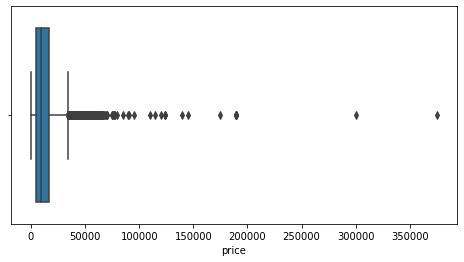

In [85]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='price')


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b>

The same comment as above, can you please add title and axis labels.

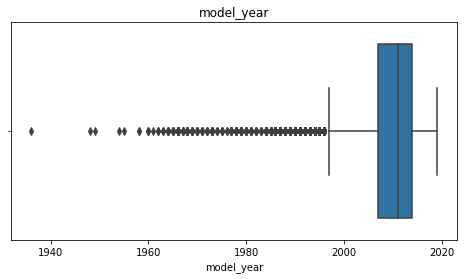

In [86]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='model_year')
plt.title('model_year')
plt.show()


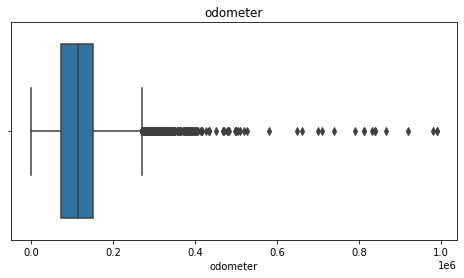

In [87]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='odometer')
plt.title('odometer')
plt.show()


In [88]:
# Store data without outliers in a separate DataFrame
data_clean.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,year_posted,car_age,avg_mile_year,condition_cat5,type_cat
count,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000
mean,12073.887401,2010.360558,6.033019,112440.735769,0.485272,39.573252,6.622425,2018.307671,7.947113,115556.618416,2.651773,2.289163
std,8167.256210,4.695837,1.631554,52451.944920,0.499788,28.233751,3.471489,0.461534,4.712596,37361.014791,0.688465,2.259650
min,1095.000000,1998.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,16887.000000,0.000000,0.000000
25%,5600.000000,2007.000000,4.000000,76413.750000,0.000000,19.000000,3.000000,2018.000000,4.000000,93648.703319,2.000000,1.000000
50%,9896.000000,2011.000000,6.000000,113598.000000,0.000000,33.000000,7.000000,2018.000000,7.000000,124883.614978,3.000000,2.000000
75%,16900.000000,2014.000000,8.000000,150000.000000,1.000000,53.000000,10.000000,2019.000000,11.000000,143331.120915,3.000000,3.000000
max,38000.000000,2019.000000,12.000000,239950.000000,1.000000,271.000000,12.000000,2019.000000,21.000000,179581.455128,5.000000,12.000000


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Can you please share how these numbers have been determined?
    
There are several ways to find outliers in data:

Visualization: You can create a box plot or a scatter plot of the data and look for points that fall outside of the "normal" range.

Interquartile range (IQR) method: You can calculate the interquartile range (IQR) of the data and identify points that fall outside of the range defined by the 25th and 75th percentiles. Any point that is more than 1.5 times the IQR below the 25th percentile or above the 75th percentile is considered an outlier.

Other mode advanced method I will skip for now. 

## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

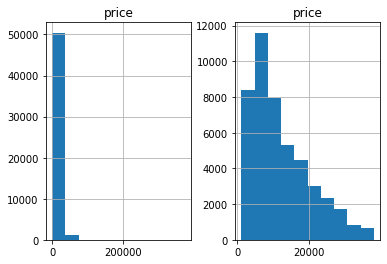

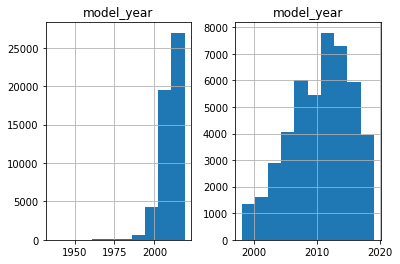

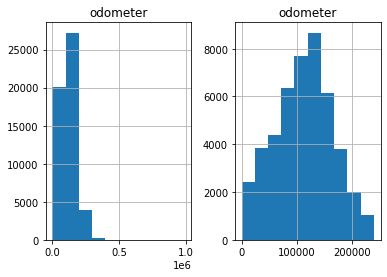

In [89]:
for parameter in ['price','model_year','odometer']:
    fig, axes = plt.subplots(1, 2)
    data.hist(parameter,ax=axes[0])
    data_clean.hist(parameter,ax=axes[1])

Now the data is more Centralized

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

In [90]:
data_clean['days_listed'].mean()

39.573251846412994

In [91]:
data_clean['days_listed'].median()

33.0

In [92]:
data_clean['days_listed'].mode()

0    20
dtype: int64

<AxesSubplot:xlabel='price', ylabel='days_listed'>

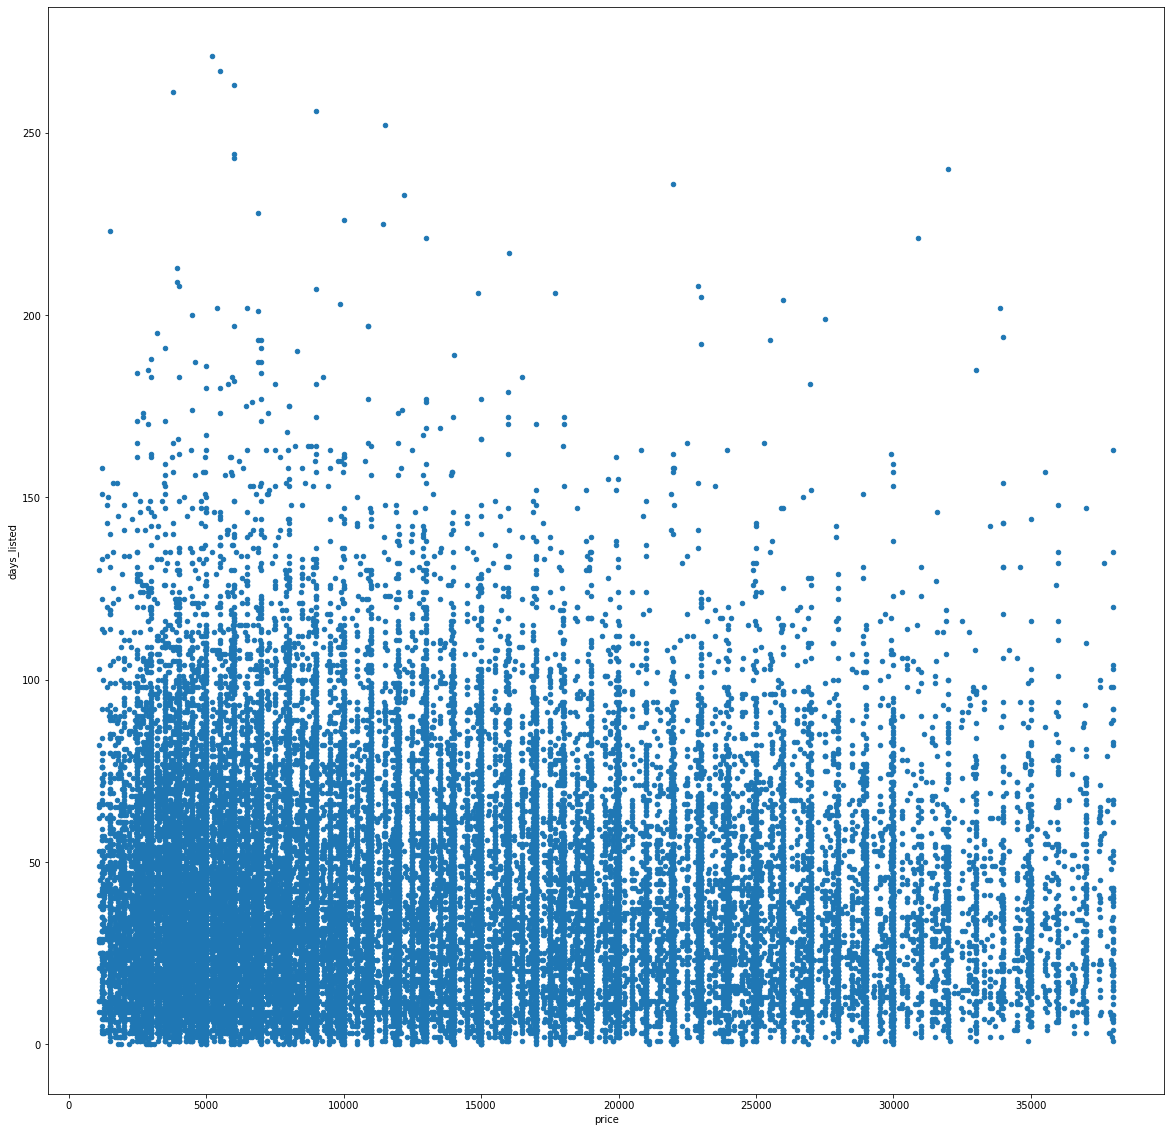

In [93]:
data_clean.plot(x='price',y='days_listed',kind='scatter',figsize=(20,20))

In [94]:
data_clean.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,month_posted,year_posted,car_age,avg_mile_year,condition_cat5,type_cat
count,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000,46306.000000
mean,12073.887401,2010.360558,6.033019,112440.735769,0.485272,39.573252,6.622425,2018.307671,7.947113,115556.618416,2.651773,2.289163
std,8167.256210,4.695837,1.631554,52451.944920,0.499788,28.233751,3.471489,0.461534,4.712596,37361.014791,0.688465,2.259650
min,1095.000000,1998.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,16887.000000,0.000000,0.000000
25%,5600.000000,2007.000000,4.000000,76413.750000,0.000000,19.000000,3.000000,2018.000000,4.000000,93648.703319,2.000000,1.000000
50%,9896.000000,2011.000000,6.000000,113598.000000,0.000000,33.000000,7.000000,2018.000000,7.000000,124883.614978,3.000000,2.000000
75%,16900.000000,2014.000000,8.000000,150000.000000,1.000000,53.000000,10.000000,2019.000000,11.000000,143331.120915,3.000000,3.000000
max,38000.000000,2019.000000,12.000000,239950.000000,1.000000,271.000000,12.000000,2019.000000,21.000000,179581.455128,5.000000,12.000000


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Typical lifetime of an ad has been correctly identified.

## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

In [95]:
data_clean.groupby('type')['price'].mean()

type
bus            19959.166667
convertible    13740.585443
coupe          14606.219098
hatchback       7101.440291
mini-van        8255.754054
offroad        15746.928144
other          11056.722467
pickup         16185.482652
sedan           7287.474333
suv            11206.629927
truck          16488.053026
van            11110.813243
wagon           9285.815534
Name: price, dtype: float64

In [96]:
data_clean.groupby('type')['days_listed'].count()

type
bus               18
convertible      316
coupe           1885
hatchback        963
mini-van        1110
offroad          167
other            227
pickup          6139
sedan          11435
suv            11341
truck          10674
van              589
wagon           1442
Name: days_listed, dtype: int64

<AxesSubplot:xlabel='odometer'>

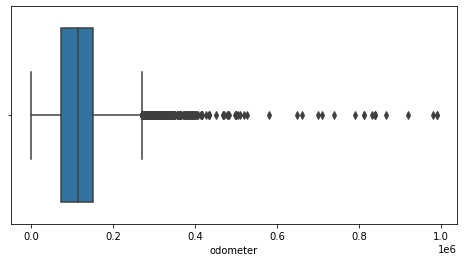

In [97]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='odometer')

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Unfortunately, histplot is not suitable to show values for categorical variables. I can advise using either boxplot or barplot with the average price per category type.

In [98]:
data_clean['type'].value_counts()

sedan          11435
suv            11341
truck          10674
pickup          6139
coupe           1885
wagon           1442
mini-van        1110
hatchback        963
van              589
convertible      316
other            227
offroad          167
bus               18
Name: type, dtype: int64

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]

In [99]:
sedan=data_clean[data_clean['type']=='suv']
sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,car_age,avg_mile_year,condition_cat5,type_cat
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,suv,unknown,1,2018-06-23,19,Saturday,6,2018,7,124883.614978,2,0
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,suv,black,1,2019-01-07,68,Monday,1,2019,6,102880.891908,3,0
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,suv,unknown,1,2018-07-16,19,Monday,7,2018,6,112051.523598,3,0
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,suv,blue,1,2019-02-15,17,Friday,2,2019,11,139878.910813,3,0
14,12990,2009,gmc yukon,excellent,8,gas,132285.000000,automatic,suv,black,1,2019-01-31,24,Thursday,1,2019,10,132576.798250,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500.000000,automatic,suv,unknown,1,2019-03-05,1,Tuesday,3,2019,7,112051.523598,2,0
51496,4999,2002,toyota 4runner,excellent,6,gas,177901.000000,automatic,suv,unknown,1,2018-05-26,59,Saturday,5,2018,16,158508.842286,3,0
51500,6995,2012,buick enclave,excellent,6,gas,157000.000000,automatic,suv,white,1,2018-08-04,17,Saturday,8,2018,6,112051.523598,3,0
51502,7995,2011,chevrolet equinox,like new,4,gas,111088.000000,automatic,suv,unknown,0,2019-04-01,175,Monday,4,2019,8,124883.614978,4,0


In [100]:
suv=data_clean[data_clean['type']=='suv']
suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week,month_posted,year_posted,car_age,avg_mile_year,condition_cat5,type_cat
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,suv,unknown,1,2018-06-23,19,Saturday,6,2018,7,124883.614978,2,0
7,15990,2013,honda pilot,excellent,6,gas,109473.000000,automatic,suv,black,1,2019-01-07,68,Monday,1,2019,6,102880.891908,3,0
8,11500,2012,kia sorento,excellent,4,gas,104174.000000,automatic,suv,unknown,1,2018-07-16,19,Monday,7,2018,6,112051.523598,3,0
9,9200,2008,honda pilot,excellent,6,gas,147191.000000,automatic,suv,blue,1,2019-02-15,17,Friday,2,2019,11,139878.910813,3,0
14,12990,2009,gmc yukon,excellent,8,gas,132285.000000,automatic,suv,black,1,2019-01-31,24,Thursday,1,2019,10,132576.798250,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,2012,chevrolet traverse,good,6,gas,144500.000000,automatic,suv,unknown,1,2019-03-05,1,Tuesday,3,2019,7,112051.523598,2,0
51496,4999,2002,toyota 4runner,excellent,6,gas,177901.000000,automatic,suv,unknown,1,2018-05-26,59,Saturday,5,2018,16,158508.842286,3,0
51500,6995,2012,buick enclave,excellent,6,gas,157000.000000,automatic,suv,white,1,2018-08-04,17,Saturday,8,2018,6,112051.523598,3,0
51502,7995,2011,chevrolet equinox,like new,4,gas,111088.000000,automatic,suv,unknown,0,2019-04-01,175,Monday,4,2019,8,124883.614978,4,0


In [101]:
five_scatter=sedan[['price','model_year','odometer','condition_cat5','paint_color']]
five_scatter

,price,model_year,odometer,condition_cat5,paint_color
0,9400,2011,145000.000000,2,unknown
7,15990,2013,109473.000000,3,black
8,11500,2012,104174.000000,3,unknown
9,9200,2008,147191.000000,3,blue
14,12990,2009,132285.000000,3,black
...,...,...,...,...,...
51495,9500,2012,144500.000000,2,unknown
51496,4999,2002,177901.000000,3,unknown
51500,6995,2012,157000.000000,3,white
51502,7995,2011,111088.000000,4,unknown


In [102]:
five_scatter1=suv[['price','model_year','odometer','condition_cat5']]
five_scatter1

,price,model_year,odometer,condition_cat5
0,9400,2011,145000.000000,2
7,15990,2013,109473.000000,3
8,11500,2012,104174.000000,3
9,9200,2008,147191.000000,3
14,12990,2009,132285.000000,3
...,...,...,...,...
51495,9500,2012,144500.000000,2
51496,4999,2002,177901.000000,3
51500,6995,2012,157000.000000,3
51502,7995,2011,111088.000000,4


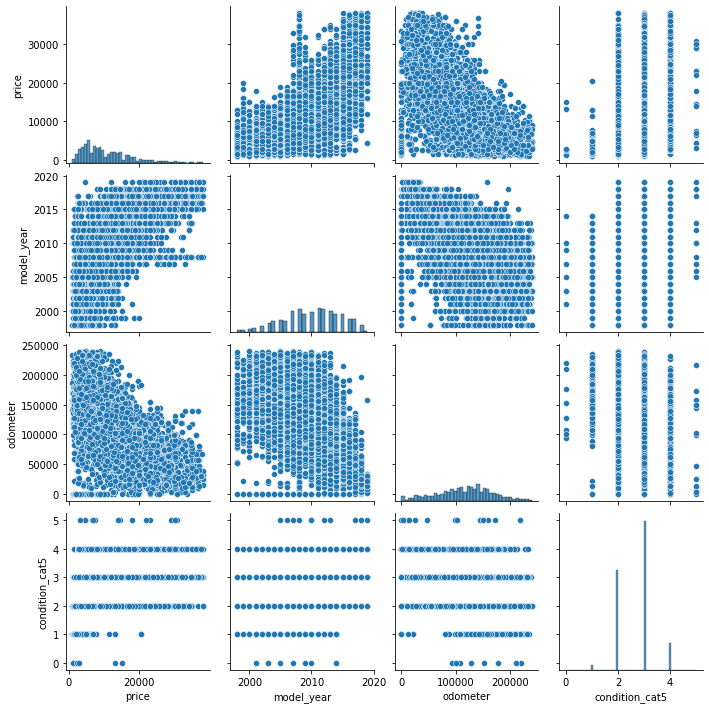

In [103]:
sns.pairplot(five_scatter)

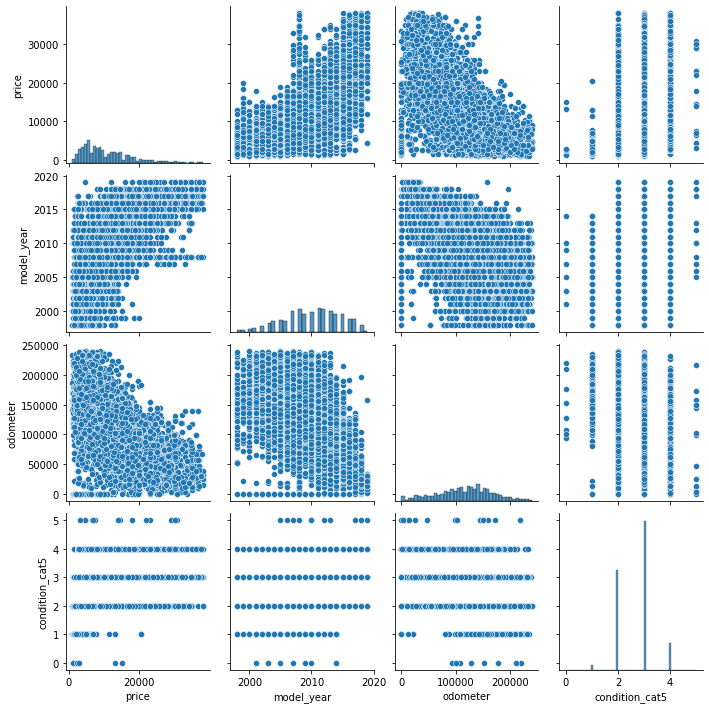

In [104]:
sns.pairplot(five_scatter1)

conclusion:
1. As the mileage gets higher, the price becomes lower.
2. As the model year gets older , the price becomes lower
3. The newest cars are in the best conditions
4. The older cars have been used for higher mileage(odometer)

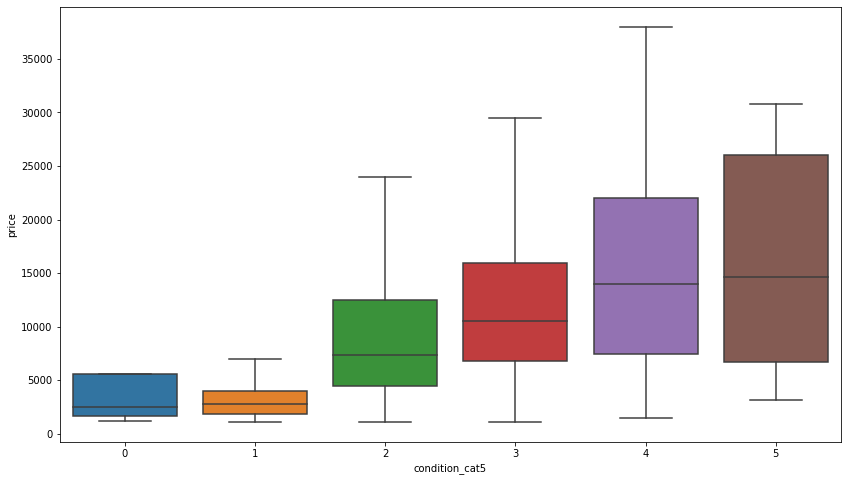

In [105]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="condition_cat5", y="price", data=sedan,showfliers = False)

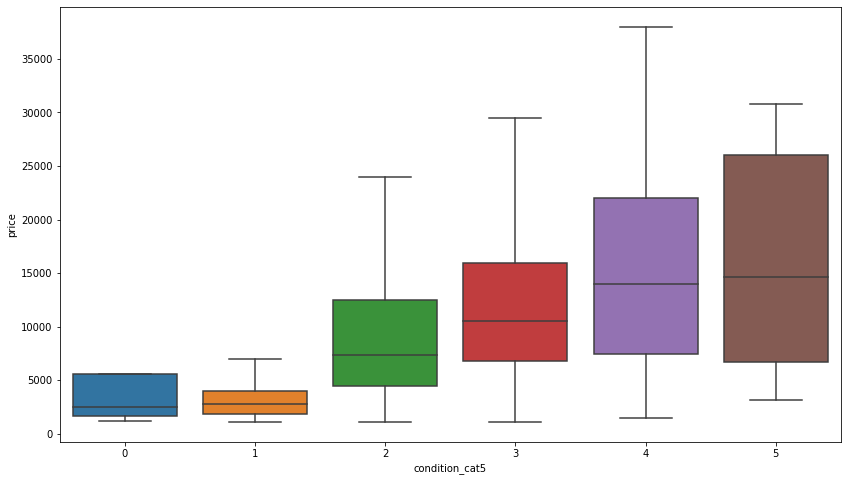

In [106]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="condition_cat5", y="price", data=suv,showfliers = False)

As I expected, there is a clear correlation between the condition of the car and it's price. The onle issue is about cars in condition 1 that have for some reason a lower price compared to cars in condition 0 that should be even less possible to use.
 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.

Great that you managed to check correlation and created a scatter plot for different features.
    
Aadditionally to the correlation matrix you can create a heatmap to check the correlation of different features.

</div>

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

Missing values:

All missing values were filled without any important diffculties.

In the "model_year" column, I filled in the missing values with the most common value.
In the "cylinders" column I filled in the missing values according to the model, because this is the best way to figure out  what the number of cylinders are where the data  is not specified about that deatils. Most likely car factories produce the same number of cylinders for the same model.
In the "is_4wd" column I filled the missing values with 0. Because they probably aren't.
The color column is filled with the common value (white)
The mileage column is filled in on average number according to the year of the vehicle.

Duplicates:

There were no duplicates according my research.

Outliers:

After analyzing the outliers, I decided to drop the most extreme only in price, mileage, and vehicle year columns. Because in these parameters the extreme values do have a major effect on my analysis, the rest of the columns where extreme values were found naturally had to be included in the analysis. For example, the number of cylinders, it is true that there are vehicles with a high number like 12 but this still does not make them outliers, they are part of the market and must be included.

In a conclusion:

The mileage, the condition of the car, and the model year of the car have a causality to the price of the car   

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall you conducted great research with correct interim findings, clean code and nice visualisation.
- I also like your overall conclusions. It is very structured and provides insights about what you accomplished and recommendations to the business.